In [80]:
import re
from collections import Counter

import numpy as np
import pandas as pd

import matplotlib, matplotlib.pyplot as plt
from matplotlib.pyplot import imshow 
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import ExtraTreesRegressor as ETR

# from xgboost.sklearn import XGBClassifier as XGBC

# from bayes_opt import BayesianOptimization
from scipy import stats
import statsmodels.api as sm

from sklearn.impute import KNNImputer

##### check missing data
##### split on gender
##### check demographics
##### plot again

###### do the PCA first/ tSNE
###### check eigen values  ==> if same then doesn't work
###### t-SNE would probably better.


###### step4: 


In [8]:
dataset = pd.read_csv("/Users/stuti/Documents/Fourkind DS case/CHES2019_experts.csv")

In [123]:
dataset.head()

,id,party,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,...,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
0,1,1,GERB,2010,7.0,9.0,1.0,NaN,5,NaN,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,BSP,2003,5.0,6.0,4.0,NaN,3,NaN,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,DPS,2004,7.0,9.0,2.0,NaN,5,NaN,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,Volya,2017,3.0,6.0,4.0,NaN,7,NaN,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,NFSB,2014,3.0,6.0,4.0,NaN,7,NaN,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
dataset.position.value_counts()

7.0    961
6.0    884
5.0    569
3.0    365
2.0    318
1.0    253
4.0    211
Name: position, dtype: int64

In [17]:
dataset.count(axis = 1)

0       53
1       52
2       53
3       53
4       53
        ..
3818    37
3819    28
3820    20
3821    38
3822    49
Length: 3823, dtype: int64

In [7]:
dataset.describe()

,id,party,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon_dissent,lrecon_salience,galtan_blur,...,gender,dob,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
count,3823.000000,3823.000000,3823.000000,3561.000000,3523.000000,1499.000000,1802.000000,1520.000000,3523.000000,1642.000000,...,3814.000000,3674.000000,3797.000000,3799.000000,1989.000000,1989.000000,1989.000000,36.000000,43.000000,38.000000
mean,8.643735,5.353387,1864.380068,4.971637,6.085722,2.625751,3.146504,2.960526,6.355095,2.783800,...,1.710016,1972.347033,4.918093,3.326402,0.772500,1.028167,1.420311,4.916667,4.186047,4.552632
std,5.668377,3.102622,1100.263807,1.933308,2.457828,2.217037,2.596855,2.136185,2.253446,2.422755,...,0.477470,12.658841,1.885663,1.808154,0.347610,0.488534,0.607744,1.401530,2.442245,2.344601
min,1.000000,1.000000,102.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1933.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,837.000000,3.000000,4.000000,1.000000,1.000000,1.000000,5.000000,1.000000,...,1.000000,1963.000000,4.000000,2.000000,0.534522,0.690066,0.997249,4.000000,2.000000,2.250000
50%,8.000000,5.000000,2101.000000,6.000000,6.000000,2.000000,3.000000,2.000000,7.000000,2.000000,...,2.000000,1975.000000,5.000000,3.000000,0.707107,0.900337,1.264911,5.000000,5.000000,5.000000
75%,12.000000,8.000000,2804.000000,7.000000,8.000000,4.000000,5.000000,4.000000,8.000000,4.000000,...,2.000000,1982.000000,6.000000,4.000000,0.971825,1.193416,1.772104,6.000000,7.000000,7.000000
max,27.000000,14.000000,4508.000000,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,3.000000,1995.000000,11.000000,11.000000,2.121320,3.535534,3.681518,7.000000,7.000000,7.000000


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823 entries, 0 to 3822
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3823 non-null   int64  
 1   party                  3823 non-null   int64  
 2   party_name             3811 non-null   object 
 3   party_id               3823 non-null   int64  
 4   position               3561 non-null   float64
 5   eu_salience            3523 non-null   float64
 6   eu_dissent             1499 non-null   float64
 7   eu_blur                1802 non-null   float64
 8   lrecon                 3651 non-null   object 
 9   lrecon_blur            1873 non-null   object 
 10  lrecon_dissent         1520 non-null   float64
 11  lrecon_salience        3523 non-null   float64
 12  galtan                 3677 non-null   object 
 13  galtan_blur            1642 non-null   float64
 14  galtan_dissent         1676 non-null   float64
 15  galt

In [38]:
df_num = dataset.select_dtypes(include = ["float64", "int64"])

In [85]:
features = df_num.drop(columns = ["id", "party_id", "party", 'eu_econ_require', 'eu_political_require',
       'eu_googov_require'])
type(features)

pandas.core.frame.DataFrame

In [90]:
column_names = features.columns
column_names

Index(['position', 'eu_salience', 'eu_dissent', 'eu_blur', 'lrecon_dissent',
       'lrecon_salience', 'galtan_blur', 'galtan_dissent', 'galtan_salience',
       'lrgen', 'immigrate_policy', 'immigra_salience', 'immigrate_dissent',
       'multiculturalism', 'multicult_salience', 'multicult_dissent',
       'redistribution', 'redist_salience', 'environment', 'enviro_salience',
       'spendvtax', 'deregulation', 'econ_interven', 'civlib_laworder',
       'sociallifestyle', 'religious_principles', 'ethnic_minorities',
       'nationalism', 'urban_rural', 'protectionism', 'regions',
       'russian_interference', 'people_vs_elite', 'antielite_salience',
       'corrupt_salience', 'members_vs_leadership', 'eu_cohesion',
       'eu_foreign', 'eu_intmark', 'eu_budgets', 'eu_asylum', 'party_a_econ',
       'party_c_econ', 'gender', 'dob', 'lrecon_self', 'galtan_self',
       'eu_position_sd', 'lrecon_sd', 'galtan_sd'],
      dtype='object')

In [42]:
dataset.party_name.value_counts()

V            58
SPD          48
SD           46
PS           44
SDP          38
             ..
DISNY         2
KINHMA        2
CVP/PCS       2
DIKO          2
LSAP/POSL     2
Name: party_name, Length: 258, dtype: int64

In [ ]:
dataset.country

/Users/stuti/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


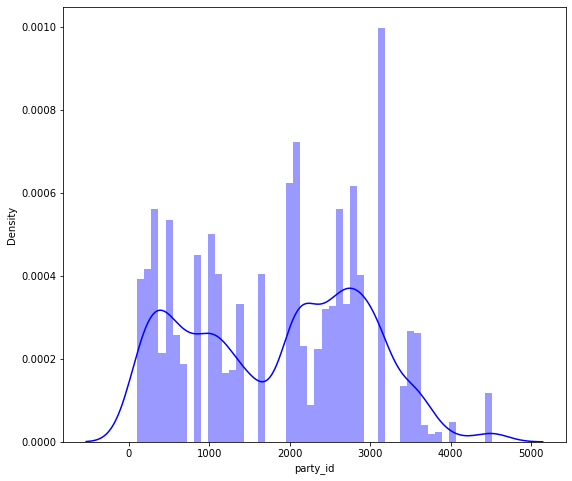

In [166]:
#plotting the distribution of target variable
plt.figure(figsize = (9,8))
sns.distplot(target, color = "b", bins = 50, hist_kws = {"alpha": 0.4});

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'party'}>,
        <AxesSubplot:title={'center':'party_id'}>,
        <AxesSubplot:title={'center':'position'}>,
        <AxesSubplot:title={'center':'eu_salience'}>,
        <AxesSubplot:title={'center':'eu_dissent'}>,
        <AxesSubplot:title={'center':'eu_blur'}>],
       [<AxesSubplot:title={'center':'lrecon_dissent'}>,
        <AxesSubplot:title={'center':'lrecon_salience'}>,
        <AxesSubplot:title={'center':'galtan_blur'}>,
        <AxesSubplot:title={'center':'galtan_dissent'}>,
        <AxesSubplot:title={'center':'galtan_salience'}>,
        <AxesSubplot:title={'center':'lrgen'}>,
        <AxesSubplot:title={'center':'immigrate_policy'}>],
       [<AxesSubplot:title={'center':'immigra_salience'}>,
        <AxesSubplot:title={'center':'immigrate_dissent'}>,
        <AxesSubplot:title={'center':'multiculturalism'}>,
        <AxesSubplot:title={'center':'multicult_salience'}>,
        <AxesSub

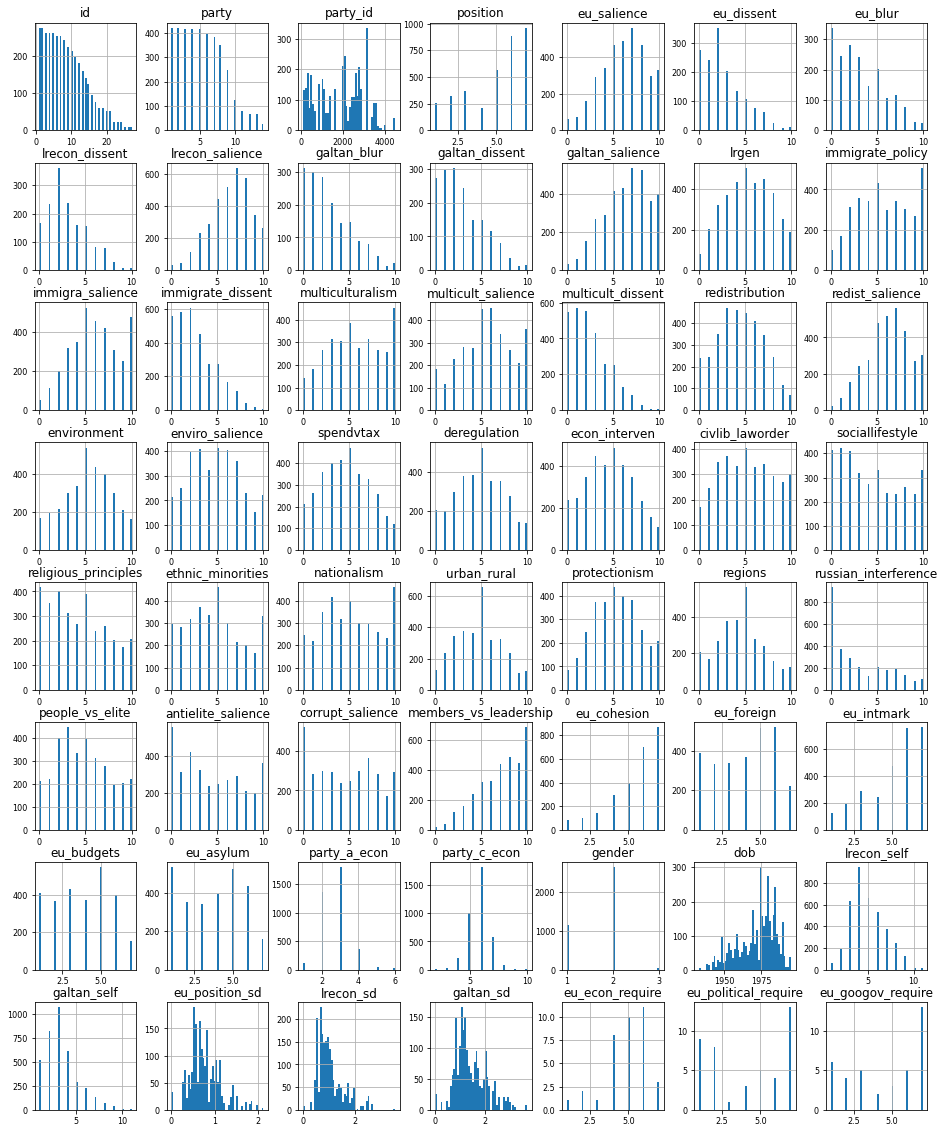

In [39]:
df_num.hist(figsize = (16,20), bins = 50 , xlabelsize = 8, ylabelsize = 8)

In [66]:
# summarize the number of unique values in each column
dataset['lrecon_blur'].value_counts()

2     263
3     249
1     247
4     212
0     187
5     181
6     146
7     143
.d     97
8      90
9      29
10     29
Name: lrecon_blur, dtype: int64

In [40]:
dataset.columns

Index(['id', 'party', 'party_name', 'party_id', 'position', 'eu_salience',
       'eu_dissent', 'eu_blur', 'lrecon', 'lrecon_blur', 'lrecon_dissent',
       'lrecon_salience', 'galtan', 'galtan_blur', 'galtan_dissent',
       'galtan_salience', 'lrgen', 'immigrate_policy', 'immigra_salience',
       'immigrate_dissent', 'multiculturalism', 'multicult_salience',
       'multicult_dissent', 'redistribution', 'redist_salience', 'environment',
       'enviro_salience', 'spendvtax', 'deregulation', 'econ_interven',
       'civlib_laworder', 'sociallifestyle', 'religious_principles',
       'ethnic_minorities', 'nationalism', 'urban_rural', 'protectionism',
       'regions', 'russian_interference', 'anti_islam_rhetoric',
       'people_vs_elite', 'antielite_salience', 'corrupt_salience',
       'members_vs_leadership', 'eu_cohesion', 'eu_foreign', 'eu_intmark',
       'eu_budgets', 'eu_asylum', 'party_a_econ', 'party_b_econ',
       'party_c_econ', 'gender', 'dob', 'lrecon_self', 'galtan_sel

In [56]:
nulls = dataset.isnull().sum()

# this will show only features that have nonzero missing values
nulls[nulls!=0]

party_name                 12
position                  262
eu_salience               300
eu_dissent               2324
eu_blur                  2021
lrecon                    172
lrecon_blur              1950
lrecon_dissent           2303
lrecon_salience           300
galtan                    146
galtan_blur              2181
galtan_dissent           2147
galtan_salience           338
lrgen                     213
immigrate_policy          385
immigra_salience          364
immigrate_dissent         729
multiculturalism          656
multicult_salience        656
multicult_dissent         952
redistribution            427
redist_salience           494
environment               561
enviro_salience           456
spendvtax                 483
deregulation              583
econ_interven             391
civlib_laworder           418
sociallifestyle           362
religious_principles      603
ethnic_minorities         547
nationalism               333
urban_rural               623
protection

In [81]:
#imputing missing data using kNN
imputer = KNNImputer(n_neighbors=5, weights="uniform")

In [87]:
f_new = imputer.fit_transform(np.array(features))
f_new

array([[ 7.        ,  9.        ,  1.        , ...,  0.77332876,
         0.96931801,  1.45293342],
       [ 5.        ,  6.        ,  4.        , ...,  1.1057108 ,
         0.91787016,  1.63148464],
       [ 7.        ,  9.        ,  2.        , ...,  0.77736145,
         1.08251315,  1.71523848],
       ...,
       [ 3.8       ,  7.6       ,  2.        , ...,  1.0878112 ,
         1.9649711 ,  1.1929278 ],
       [ 2.        ,  5.        ,  2.4       , ...,  1.0878112 ,
         1.9649711 ,  1.1929278 ],
       [ 2.        , 10.        ,  7.        , ...,  1.0878112 ,
         1.9649711 ,  1.1929278 ]])

In [88]:
features_imputed = pd.DataFrame(f_new)

In [91]:
features_imputed.columns = ['position', 'eu_salience', 'eu_dissent', 'eu_blur', 'lrecon_dissent',
       'lrecon_salience', 'galtan_blur', 'galtan_dissent', 'galtan_salience',
       'lrgen', 'immigrate_policy', 'immigra_salience', 'immigrate_dissent',
       'multiculturalism', 'multicult_salience', 'multicult_dissent',
       'redistribution', 'redist_salience', 'environment', 'enviro_salience',
       'spendvtax', 'deregulation', 'econ_interven', 'civlib_laworder',
       'sociallifestyle', 'religious_principles', 'ethnic_minorities',
       'nationalism', 'urban_rural', 'protectionism', 'regions',
       'russian_interference', 'people_vs_elite', 'antielite_salience',
       'corrupt_salience', 'members_vs_leadership', 'eu_cohesion',
       'eu_foreign', 'eu_intmark', 'eu_budgets', 'eu_asylum', 'party_a_econ',
       'party_c_econ', 'gender', 'dob', 'lrecon_self', 'galtan_self',
       'eu_position_sd', 'lrecon_sd', 'galtan_sd']

In [92]:
features_imputed

,position,eu_salience,eu_dissent,eu_blur,lrecon_dissent,lrecon_salience,galtan_blur,galtan_dissent,galtan_salience,lrgen,...,eu_asylum,party_a_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd
0,7.0,9.0,1.0,1.2,1.0,10.0,4.2,5.0,5.0,5.0,...,4.0,3.0,6.0,1.0,1948.0,9.0,3.0,0.773329,0.969318,1.452933
1,5.0,6.0,4.0,3.2,5.0,7.0,6.4,5.0,8.0,3.8,...,4.0,3.0,6.0,1.0,1948.0,9.0,3.0,1.105711,0.917870,1.631485
2,7.0,9.0,2.0,0.6,1.0,9.0,4.2,2.0,8.0,4.0,...,6.0,3.0,6.0,1.0,1948.0,9.0,3.0,0.777361,1.082513,1.715238
3,3.0,6.0,4.0,3.4,5.0,9.0,3.6,2.0,8.0,6.0,...,3.0,3.0,6.0,1.0,1948.0,9.0,3.0,1.046082,0.911854,1.375865
4,3.0,6.0,4.0,3.4,5.0,5.0,3.6,2.0,8.0,6.0,...,3.0,3.0,6.0,1.0,1948.0,9.0,3.0,0.970974,1.264994,1.228292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,1.0,8.0,2.8,1.0,2.0,6.6,1.0,2.0,6.0,8.0,...,2.0,3.0,5.0,2.0,1976.0,5.0,3.0,1.087811,1.964971,1.192928
3819,1.0,10.0,0.0,3.0,3.4,5.0,1.6,3.0,5.6,8.0,...,2.2,2.0,7.0,2.0,1959.0,6.0,3.0,1.087811,1.964971,1.192928
3820,3.8,7.6,2.0,1.0,5.4,4.2,5.0,2.6,4.6,4.2,...,3.6,3.0,5.0,1.0,1990.0,3.0,2.0,1.087811,1.964971,1.192928
3821,2.0,5.0,2.4,3.0,3.4,6.8,2.8,0.6,7.0,8.0,...,1.0,3.0,5.0,1.0,1977.0,5.0,3.0,1.087811,1.964971,1.192928


In [107]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

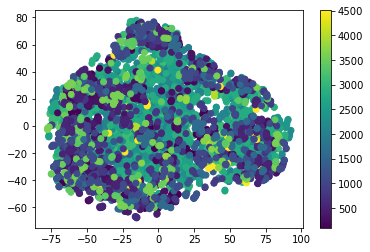

In [159]:
proj = pca.fit_transform(features_imputed)

plt.scatter(proj[:, 0], proj[:, 1], c = target)
plt.colorbar()

In [109]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.38553716 0.1837468 ]
[774.48047744 534.67175916]


In [110]:
print(pca.components_)

[[ 1.54368465e-03  2.89108925e-02  2.04387325e-02  8.07389361e-03
   1.01098448e-02  1.23440440e-02  7.10562041e-03  6.07020627e-03
   1.65612736e-02  7.86796370e-03  1.54524950e-02  3.71375985e-02
  -2.13854224e-03  8.73470018e-03  2.94965022e-02 -4.09277135e-03
  -2.25352908e-04  9.06832652e-03  8.29350887e-03  1.51252760e-02
  -9.62016784e-04 -1.48098575e-03  1.87778996e-03  6.26922181e-03
   1.29763051e-02  1.04478560e-02  4.92321522e-03  1.21031712e-02
  -1.21644297e-03  8.92282643e-03  1.34165797e-02  5.66794464e-02
  -5.82103573e-03  2.51984734e-02  4.42204327e-02  8.26869781e-03
  -8.51125826e-03 -5.08560114e-04 -1.20220809e-03 -1.18751325e-03
  -7.16969620e-03  7.09615952e-03 -6.93127962e-03  4.52387681e-03
  -9.93908435e-01  1.03736058e-02  1.24941494e-02  1.47839785e-03
   2.69111075e-03  1.33244334e-03]
 [-1.28518332e-01 -2.60183371e-02  2.55361515e-03  5.96613136e-02
   1.46986244e-02 -6.12424051e-02 -2.32221462e-03 -1.03486472e-02
   4.49833630e-02  2.21149606e-01  2.9040

In [114]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(np.array(features_imputed))

In [116]:
X_embedded

array([[-19.140581, -71.04068 ],
       [-20.804121, -55.334717],
       [-18.762459, -71.04526 ],
       ...,
       [ 26.892431,  61.317326],
       [-44.339695,  33.413433],
       [-38.922665, -62.366444]], dtype=float32)

In [150]:
target = dataset["party_id"]
target.fillna(method = "ffill")

0       2010
1       2003
2       2004
3       2017
4       2014
        ... 
3818    1110
3819    1110
3820    1110
3821    1110
3822    1110
Name: party_id, Length: 3823, dtype: int64

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

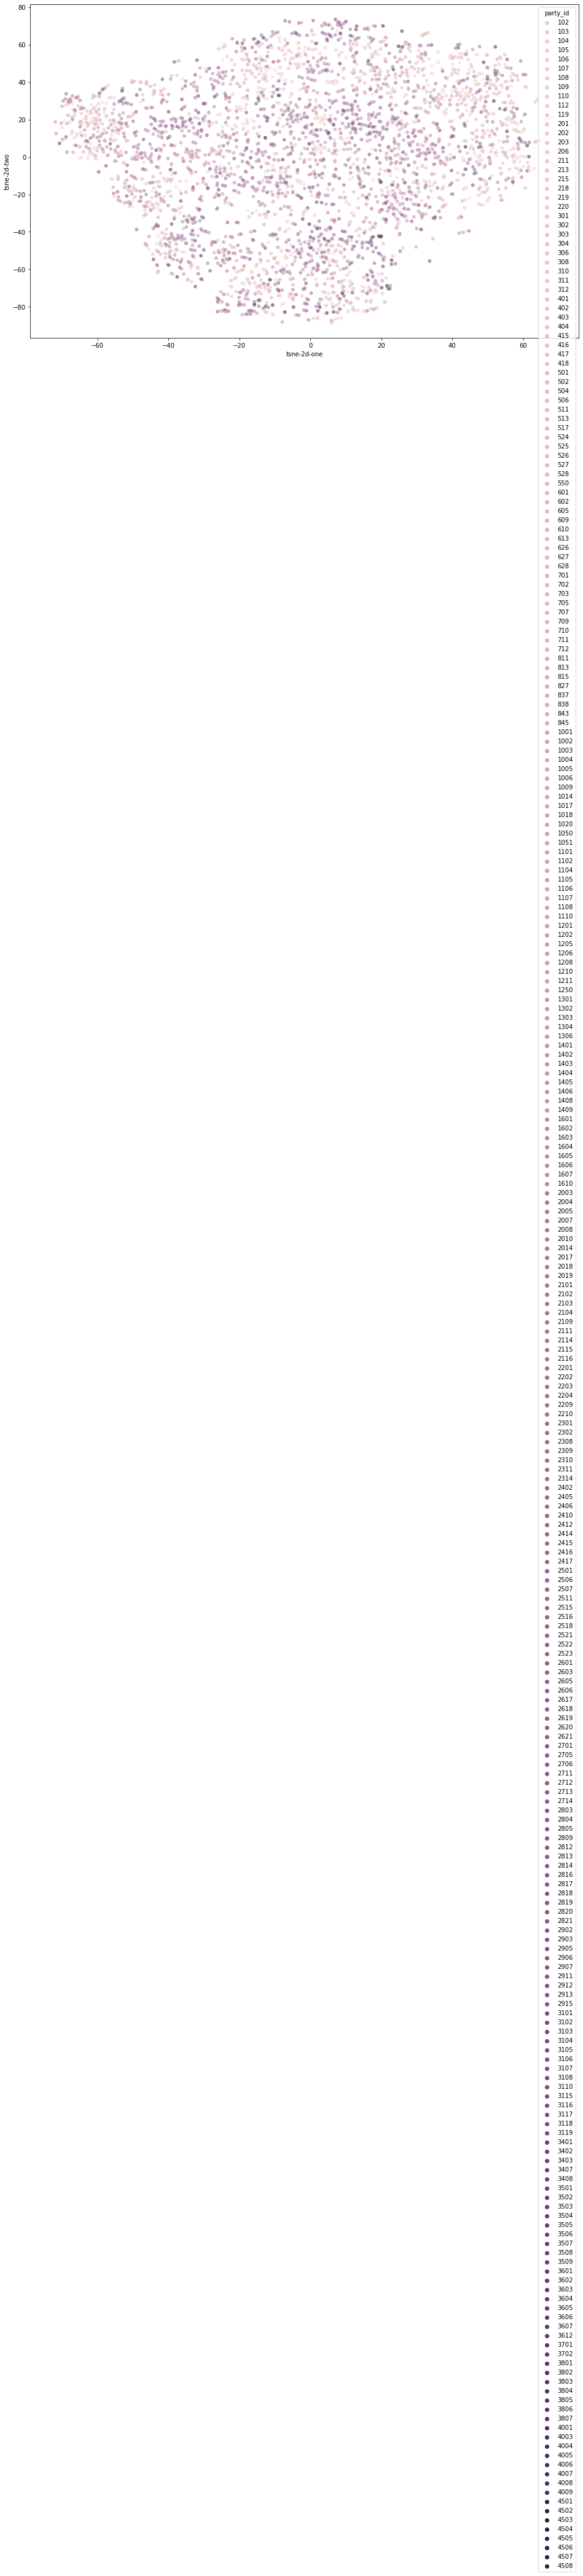

In [160]:
features_imputed['tsne-2d-one'] = X_embedded[:,0]
features_imputed['tsne-2d-two'] = X_embedded[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=target,
#     palette=sns.color_palette("hls", 10),
    data=features_imputed,
    legend="full",
    alpha=0.4
)

In [167]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 1.3 MB/s eta 0:00:01    |█████▍                          | 2.6 MB 2.5 MB/s eta 0:00:05


In [168]:
import sweetviz as sv

In [170]:
df = pd.read_csv("/Users/stuti/Documents/Fourkind DS case/CHES2019_experts.csv")

In [171]:
survey = sv.analyze(df)
survey.show_html("survey.html")


Report survey.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [58]:
nulls_percentage = nulls[nulls!=0]/dataset.shape[0]*100
print('the percentages of null values per feature:\n')
print(round(nulls_percentage,2))

the percentages of null values per feature:

party_name                0.31
position                  6.85
eu_salience               7.85
eu_dissent               60.79
eu_blur                  52.86
lrecon                    4.50
lrecon_blur              51.01
lrecon_dissent           60.24
lrecon_salience           7.85
galtan                    3.82
galtan_blur              57.05
galtan_dissent           56.16
galtan_salience           8.84
lrgen                     5.57
immigrate_policy         10.07
immigra_salience          9.52
immigrate_dissent        19.07
multiculturalism         17.16
multicult_salience       17.16
multicult_dissent        24.90
redistribution           11.17
redist_salience          12.92
environment              14.67
enviro_salience          11.93
spendvtax                12.63
deregulation             15.25
econ_interven            10.23
civlib_laworder          10.93
sociallifestyle           9.47
religious_principles     15.77
ethnic_minorities        

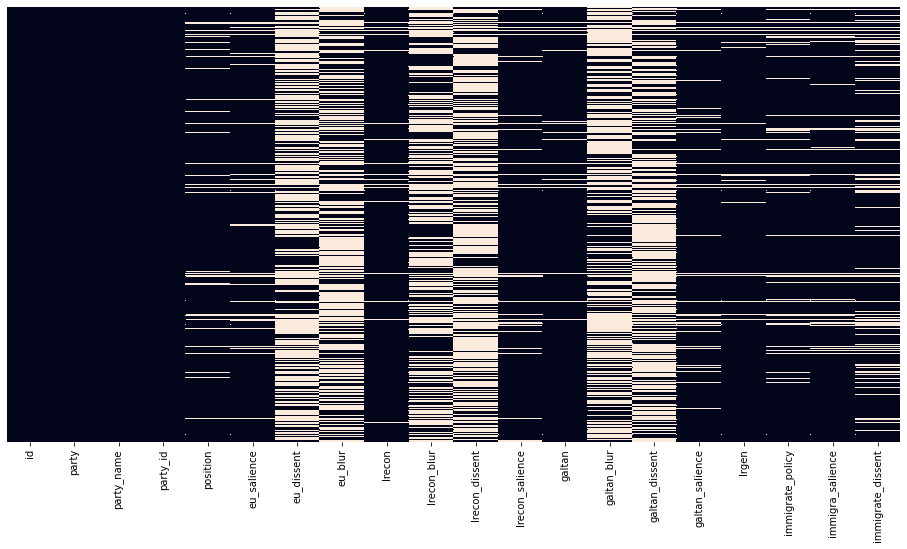

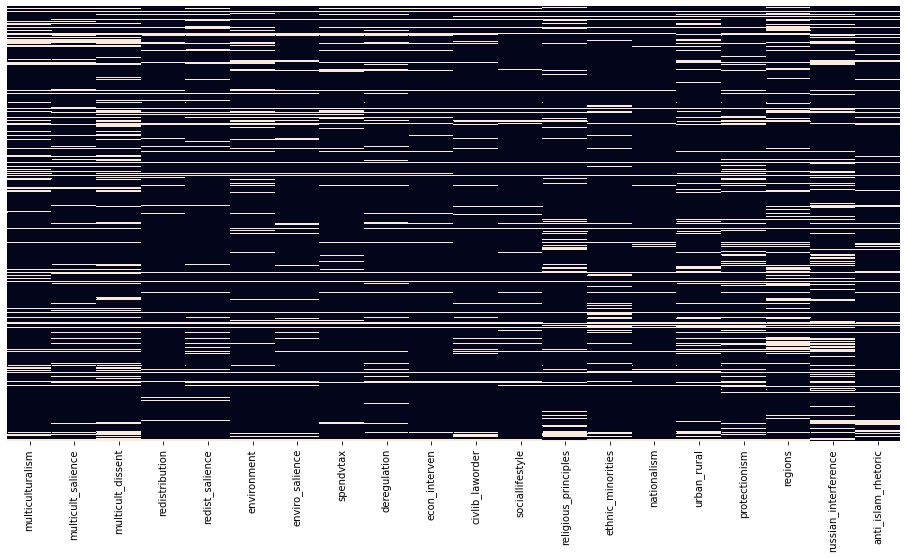

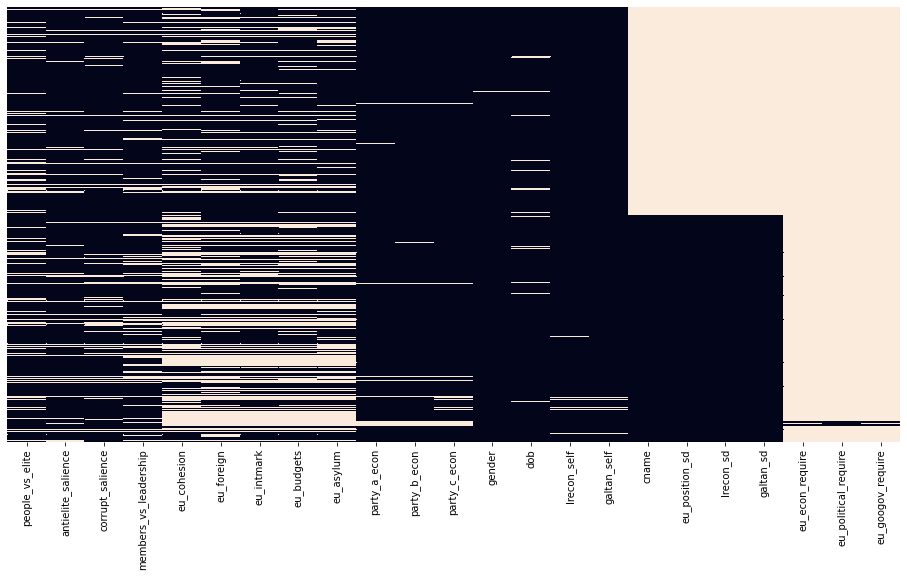

,id,party,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,...,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
count,3823.000000,3823.000000,3811,3823.000000,3561.000000,3523.000000,1499.000000,1802.000000,3651,1873,...,3674.000000,3797.000000,3799.000000,1989,1989.000000,1989.000000,1989.000000,36.000000,43.000000,38.000000
unique,NaN,NaN,258,NaN,NaN,NaN,NaN,NaN,12,12,...,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,V,NaN,NaN,NaN,NaN,NaN,5,2,...,NaN,NaN,NaN,esp,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,502,263,...,NaN,NaN,NaN,195,NaN,NaN,NaN,NaN,NaN,NaN
mean,8.643735,5.353387,NaN,1864.380068,4.971637,6.085722,2.625751,3.146504,NaN,NaN,...,1972.347033,4.918093,3.326402,NaN,0.772500,1.028167,1.420311,4.916667,4.186047,4.552632
std,5.668377,3.102622,NaN,1100.263807,1.933308,2.457828,2.217037,2.596855,NaN,NaN,...,12.658841,1.885663,1.808154,NaN,0.347610,0.488534,0.607744,1.401530,2.442245,2.344601
min,1.000000,1.000000,NaN,102.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,...,1933.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,NaN,837.000000,3.000000,4.000000,1.000000,1.000000,NaN,NaN,...,1963.000000,4.000000,2.000000,NaN,0.534522,0.690066,0.997249,4.000000,2.000000,2.250000
50%,8.000000,5.000000,NaN,2101.000000,6.000000,6.000000,2.000000,3.000000,NaN,NaN,...,1975.000000,5.000000,3.000000,NaN,0.707107,0.900337,1.264911,5.000000,5.000000,5.000000
75%,12.000000,8.000000,NaN,2804.000000,7.000000,8.000000,4.000000,5.000000,NaN,NaN,...,1982.000000,6.000000,4.000000,NaN,0.971825,1.193416,1.772104,6.000000,7.000000,7.000000


In [48]:
import matplotlib.pyplot as plt

fig_width = 16
fig_height = 8
plt.rcParams["figure.figsize"] = [fig_width, fig_height]

sns.heatmap(dataset[dataset.columns[0:20]].isnull(),yticklabels=False,cbar=False)
plt.show()

sns.heatmap(dataset[dataset.columns[20:40]].isnull(),yticklabels=False,cbar=False)
plt.show()

sns.heatmap(dataset[dataset.columns[40:63]].isnull(),yticklabels=False,cbar=False)
plt.show()

dataset.describe(include='all')

In [59]:
# flagging featuresmore than half values missing
feature_flag_list = ["eu_dissent", "eu_blur", "lrecon_blur", "lrecon_dissent", "galtan_blur", "galtan_dissent"]

# features that might diminish the predictive power
feature_drop_list = ["eu_econ_require", "eu_political_require", "eu_googov_require"]

In [11]:
dataset.columns

Index(['id', 'party', 'party_name', 'party_id', 'position', 'eu_salience',
       'eu_dissent', 'eu_blur', 'lrecon', 'lrecon_blur', 'lrecon_dissent',
       'lrecon_salience', 'galtan', 'galtan_blur', 'galtan_dissent',
       'galtan_salience', 'lrgen', 'immigrate_policy', 'immigra_salience',
       'immigrate_dissent', 'multiculturalism', 'multicult_salience',
       'multicult_dissent', 'redistribution', 'redist_salience', 'environment',
       'enviro_salience', 'spendvtax', 'deregulation', 'econ_interven',
       'civlib_laworder', 'sociallifestyle', 'religious_principles',
       'ethnic_minorities', 'nationalism', 'urban_rural', 'protectionism',
       'regions', 'russian_interference', 'anti_islam_rhetoric',
       'people_vs_elite', 'antielite_salience', 'corrupt_salience',
       'members_vs_leadership', 'eu_cohesion', 'eu_foreign', 'eu_intmark',
       'eu_budgets', 'eu_asylum', 'party_a_econ', 'party_b_econ',
       'party_c_econ', 'gender', 'dob', 'lrecon_self', 'galtan_sel

In [63]:
features_original = dataset.shape[1]
df_new = dataset.drop(columns = feature_drop_list)

features_reduced = df_new.shape[1]
print('number of features reduced from %d to %d'%(features_original,features_reduced))

number of features reduced from 63 to 60


In [65]:
df_new.select_dtypes(exclude='number').nunique()

party_name             258
lrecon                  12
lrecon_blur             12
galtan                  12
anti_islam_rhetoric     12
party_b_econ             7
cname                   21
dtype: int64

In [72]:
df_new.drop(columns = ["id", "party", "party_name"], inplace = True)

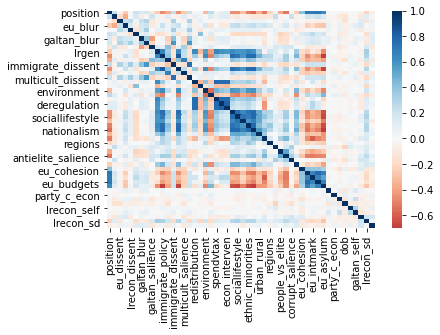

In [93]:
sns.heatmap(features_imputed.corr(), cmap='RdBu',center=0)
plt.show()

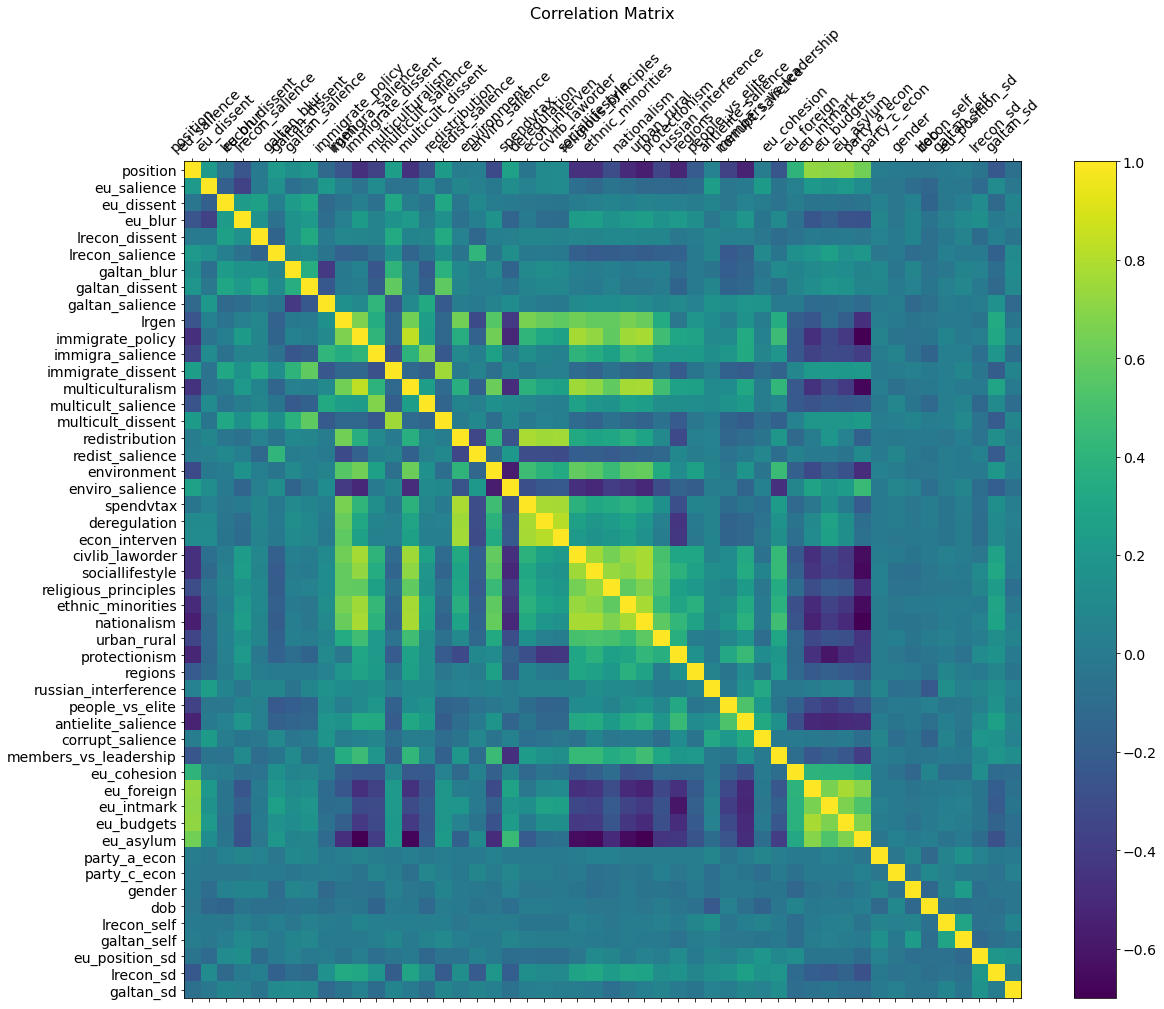

In [96]:
f = plt.figure(figsize=(19, 15))
plt.matshow(features_imputed.corr(), fignum=f.number)
plt.xticks(range(features_imputed.select_dtypes(['number']).shape[1]), features_imputed.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(features_imputed.select_dtypes(['number']).shape[1]), features_imputed.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [97]:
corr = features_imputed.corr()
corr[(corr >= 0.5) | (corr <= -0.4)].style.background_gradient(cmap='coolwarm')

,position,eu_salience,eu_dissent,eu_blur,lrecon_dissent,lrecon_salience,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd
position,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.463241,nan,nan,-0.455044,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.455596,-0.460138,nan,-0.496088,-0.557214,nan,-0.519324,nan,nan,nan,-0.534749,nan,nan,nan,0.722699,0.704777,0.718978,0.637981,nan,nan,nan,nan,nan,nan,nan,nan,nan
eu_salience,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
eu_dissent,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
eu_blur,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
lrecon_dissent,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
lrecon_salience,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
galtan_blur,nan,nan,nan,nan,nan,nan,1.000000,nan,-0.418929,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
galtan_dissent,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,0.585532,nan,nan,0.575191,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
galtan_salience,nan,nan,nan,nan,nan,nan,-0.418929,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
lrgen,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,0.661907,nan,nan,0.637891,nan,nan,0.634775,nan,0.552030,-0.409790,0.658405,0.607760,0.577905,0.634003,0.592120,0.593163,0.651729,0.603900,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.464645,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [98]:
# high correlations : lrgen: immigration policy, multiculturism, redistribution, environment, spendvtax, deregulation, econ_interven, civilb_laworder, sociallifestyle, religious principles, ethinic minorities, nationalism
# immigration policy: lrgen, multiculturism, environment, civilb_laworder, sociallifestyle, religious principles, ethinic minorities, nationalism
# immigration_dissent: multiculture_dissent

In [148]:
categorical_features = dataset[["party_id", "party_name"]]
categorical_features.fillna(axis = 1, method = "ffill")

,party_id,party_name
0,2010,GERB
1,2003,BSP
2,2004,DPS
3,2017,Volya
4,2014,NFSB
...,...,...
3818,1110,BREXIT
3819,1110,BREXIT
3820,1110,BREXIT
3821,1110,BREXIT


In [145]:
cat_enc = pd.get_dummies(categorical_features)

In [146]:
cat_enc

,party_id,party_name_50PLUS,party_name_A,party_name_ADR/PAD/AR,party_name_AGALEV,party_name_AKEL,party_name_AKP,party_name_ALDE,party_name_ANO2011,party_name_AP!,...,party_name_VLD/PVV,party_name_VU/NVA,party_name_VVD,party_name_Volya,party_name_Vox,party_name_Wiosnia,party_name_XA,party_name_ZZ,party_name_ZZS,party_name_Za Ludi
0,2010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,1110,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3819,1110,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3820,1110,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3821,1110,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
print(sklearn.__version__)

0.23.2


In [185]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=2, kernel='poly')
transformer_cosine = KernelPCA(n_components = 2, kernel = "cosine")

In [175]:
feat_transformed = transformer.fit_transform(features_imputed)
feat_transformed.shape

(3823, 2)

In [181]:
def plot_dim_red(X_transformed, target):
    plt.figure(figsize = (16,8))
    plt.scatter(feat_transformed[:, 0], feat_transformed[:, 1], c = target)
    plt.colorbar()

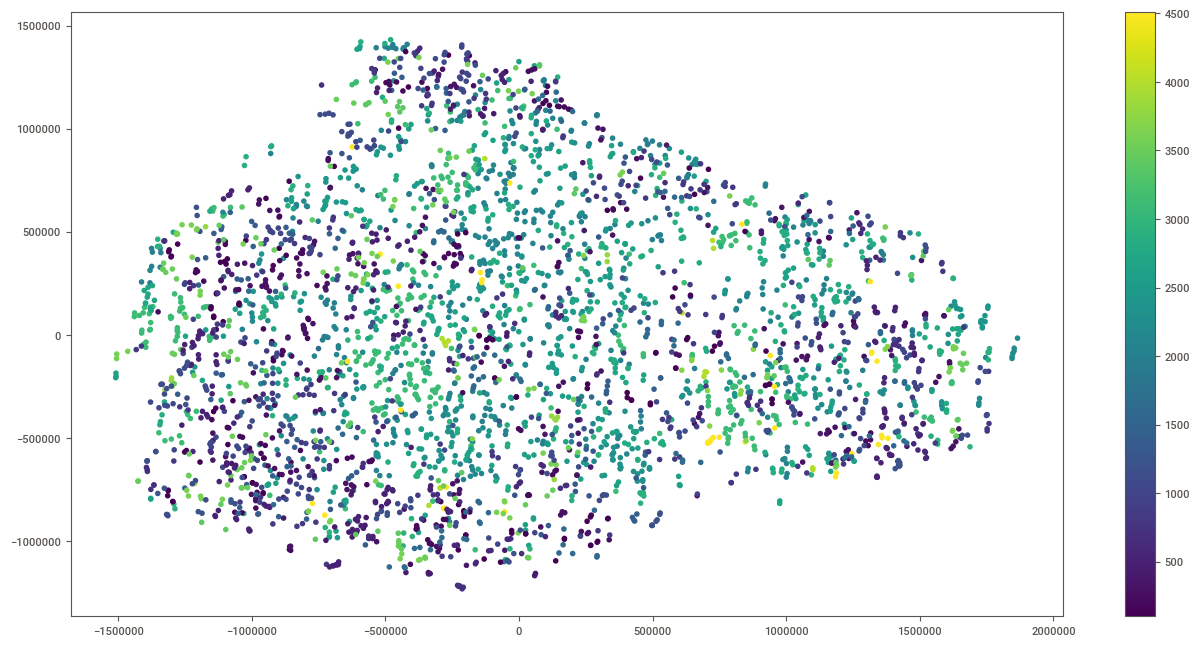

In [182]:
plot_dim_red(feat_transformed, target)

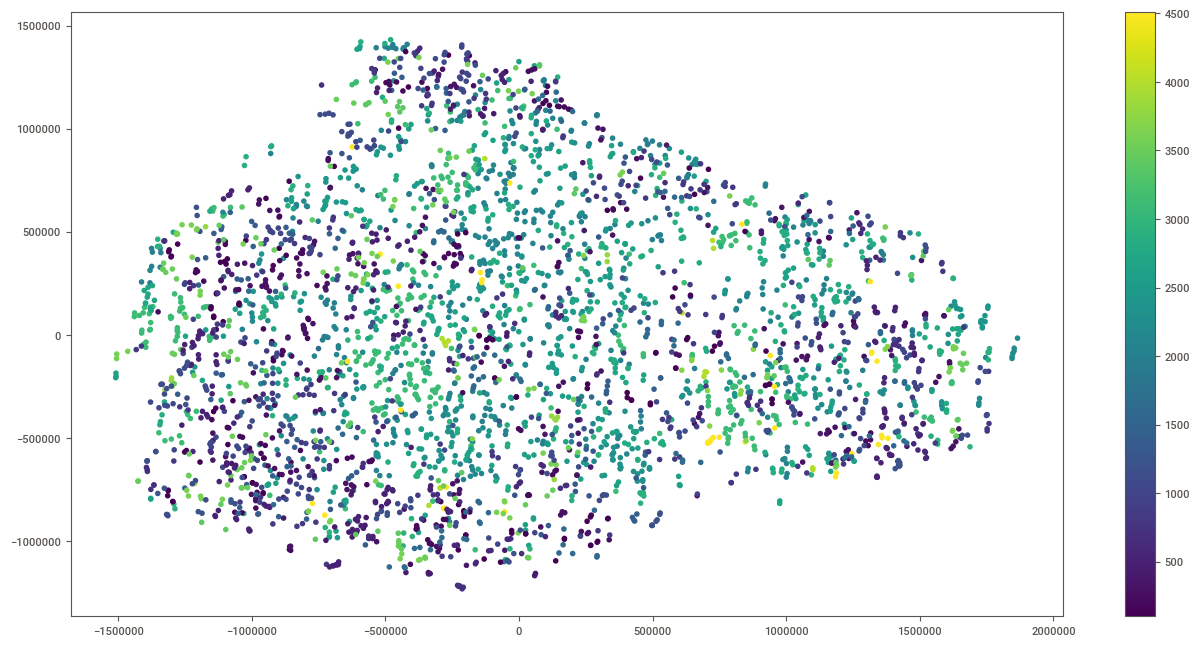

In [186]:
plot_dim_red(transformer_cosine, target)